**Regression Example 01: Stock Price Prediction**

In [ ]:
# Import neccessry libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Step 1: Download historical data for Apple

In [ ]:
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Step 2: Save to CSV for review (optional)

In [ ]:
data.to_csv('apple_stock.csv')

Step 3: Load dataset

In [ ]:
data = pd.read_csv('apple_stock.csv')
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.620849609375,72.68129646149221,71.37322569622376,71.6270995236096,135480400
3,2020-01-03,71.91482543945312,72.67645428247283,71.68996492576686,71.84712526182395,146322800
4,2020-01-06,72.48782348632812,72.52651033652293,70.78322611632959,71.03468695321472,118387200


Step 4: Data Preprocessing

In [ ]:
# Remove missing values
data = data.dropna()

In [ ]:
# Remove non-numeric columns if present
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

Step 5: Feature engineering

In [ ]:
# Select numeric features and labels
features = data[['Open', 'High', 'Low', 'Volume']]
labels = data['Close']

# Ensure all data is numeric
features = features.apply(pd.to_numeric, errors='coerce')
labels = pd.to_numeric(labels, errors='coerce')

# Drop rows with non-numeric values
features = features.dropna()
labels = labels.loc[features.index]  # Align labels with features after dropping rows


Step 6: Scaling the features

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

Step 7: Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

Step 8: Define the model

In [ ]:
model = Sequential([
    Dense(64, input_dim=4, activation='relu'),  # 4 inputs corresponding to Open, High, Low, Volume
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Single output for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 9: Compile the model

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Step 10: Train the model

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 17296.3066 - mae: 128.2572 - val_loss: 17161.8418 - val_mae: 126.7897
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17118.0742 - mae: 127.4730 - val_loss: 17036.2695 - val_mae: 126.3271
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17360.5137 - mae: 128.6456 - val_loss: 16841.9492 - val_mae: 125.5984
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16827.0117 - mae: 126.3379 - val_loss: 16494.5938 - val_mae: 124.2864
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16122.5010 - mae: 123.7540 - val_loss: 15917.3740 - val_mae: 122.0774
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15729.0918 - mae: 122.5386 - val_loss: 15046.5459 - val_mae: 118.6692
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14666.0703 - mae: 117.8596 - val_loss: 13833.2559 - val_mae: 113.7484
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13417.7402 - mae: 112.7610 - val_loss: 12260.

Step 11: Evaluate the model

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error: {mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.0342 - mae: 3.1215 
Test Loss: 17.00568962097168
Test Mean Absolute Error: 2.9007089138031006


Step 12: Predictions

In [ ]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


Step 13: Prepare results for export

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test.values,  # Convert y_test to NumPy for alignment
    'Predicted': predictions.flatten(),  # Flatten to match dimensions
})
results_df['Error'] = results_df['Actual'] - results_df['Predicted']

Step 14: Save results to CSV

In [ ]:
results_df.to_csv('predictions_results.csv', index=False)
print("Predictions and errors saved to 'predictions_results.csv'.")

Predictions and errors saved to 'predictions_results.csv'.


Step 15: Plot Training History (Optional)

In [ ]:
import matplotlib.pyplot as plt

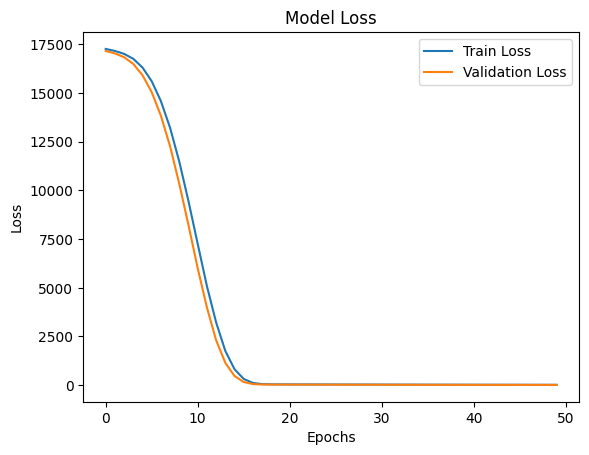

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

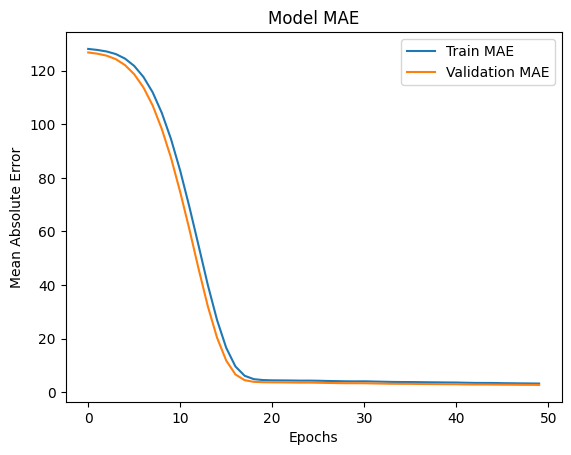

In [ ]:
# Plot MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()